Rotation Strategy
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

In [8]:
loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2007, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'EFA', 'GLD']

In [3]:
from mypo import split_k_folds
from mypo.optimizer import NoOptimizer, RotationStrategy
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import MovingAverageEvacuator
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 3416/3416 [01:03<00:00, 53.90it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             1.081402      0.313461       0.452535   

   max draw down span  
0                1318  


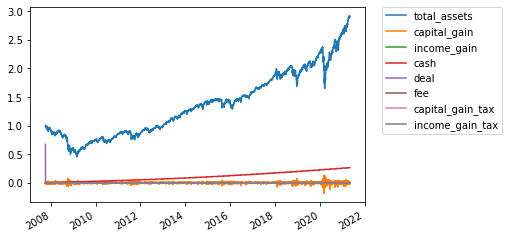

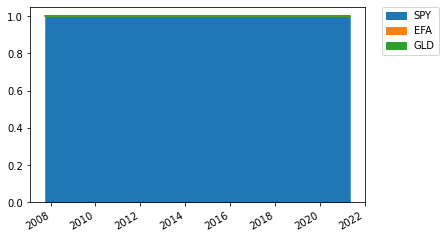

In [4]:
optimizer = NoOptimizer([1, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy
----------------------------------------

100%|██████████| 3416/3416 [00:59<00:00, 56.97it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             0.909788     -0.505326       0.187728   

   max draw down span  
0                3415  


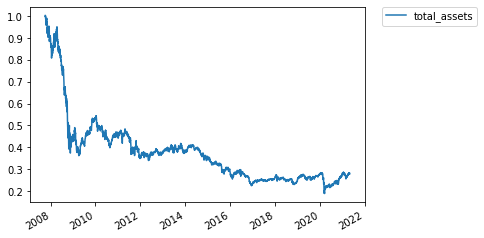

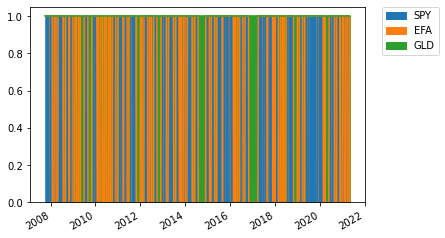

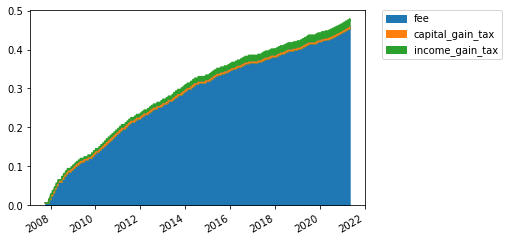

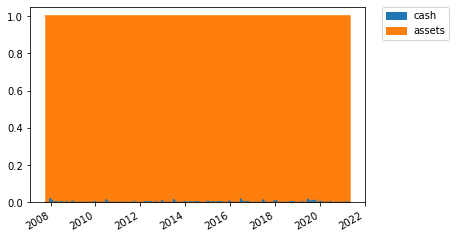

In [5]:
optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy with cash filter
----------------------------------------

100%|██████████| 3416/3416 [01:43<00:00, 32.99it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             0.943948     -0.598133       0.334897   

   max draw down span  
0                2844  


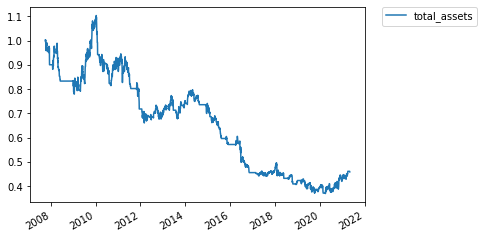

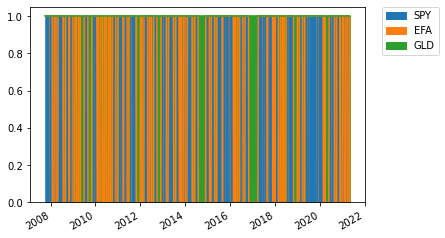

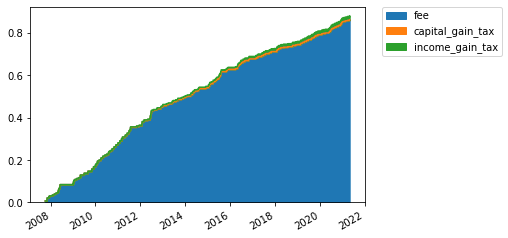

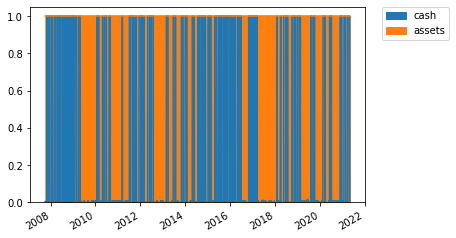

In [6]:
optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=MovingAverageEvacuator(span=150)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


If it is no fee.
-----------------

100%|██████████| 3416/3416 [01:43<00:00, 32.90it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             1.040683      0.166161       0.761535   

   max draw down span  
0                1477  


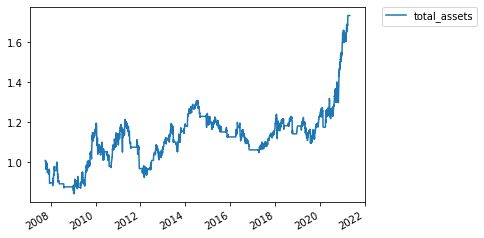

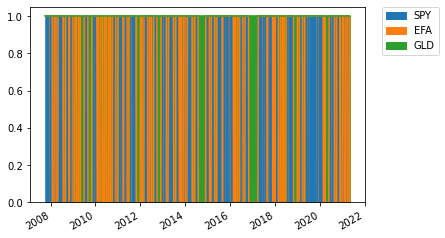

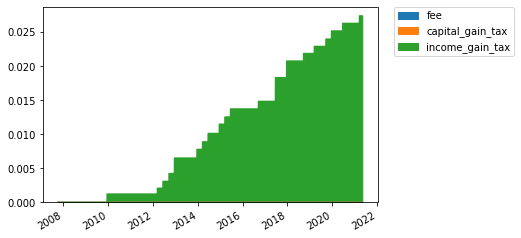

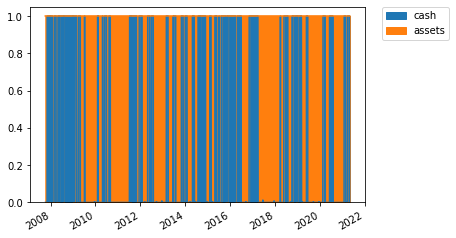

In [7]:
from mypo import Settings
from mypo.trigger import MonthlyTrigger

optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=MovingAverageEvacuator(span=150)),
    settings=Settings(tax_rate=np.float64(0.20), fee_rate=np.float64(0.00))
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
